# Problem 4

### a) Random input, compare variance

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Function for Method 2
def method_2(line, m):
    k2_est = 0
    for item in line:
        num = random.random()
        if num < 1 / m:  # check with probability 1/m
            k2_est += item  # +item acts as indicator variable instead of actually checking
    return k2_est * m  # scale up by m to get estimate of total number of 1s

# Function for Method 4
def method_4(line, m):
    k4_est = 0
    blocks = line.reshape(-1, m)  # reshape the line into blocks of size m
    for block in blocks:
        choice = random.choice(block)  # choose one item from the block at random
        k4_est += choice  # again acts as indicator variable
    return k4_est * m  # scale up by m to get estimate of total number of 1s

In [3]:
n = 100
m = 10
k_values = np.arange(15, 26)
mc_runs = 1000
k2_ests = {k: [] for k in k_values}
k4_ests = {k: [] for k in k_values}

for k in k_values:
    for run in range(mc_runs):
        line = np.zeros(n)
        line[:k] = 1 # put in k faulty items

        np.random.shuffle(line) # randomize order (same for both methods)


        # METHOD 2

        k2_ests[k].append(method_2(line, m))

        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")



        # METHOD 4

        k4_ests[k].append(method_4(line, m))

        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

In [4]:
k2_vars = [np.var(k2_ests[k], ddof=1) for k in k_values]
k4_vars = [np.var(k4_ests[k], ddof=1) for k in k_values]

k2_std_errs = [np.std(k2_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]
k4_std_errs = [np.std(k4_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]

k2_ci = 1.96 * np.array(k2_std_errs)
k4_ci = 1.96 * np.array(k4_std_errs)

### ** Claude did all this plotting **

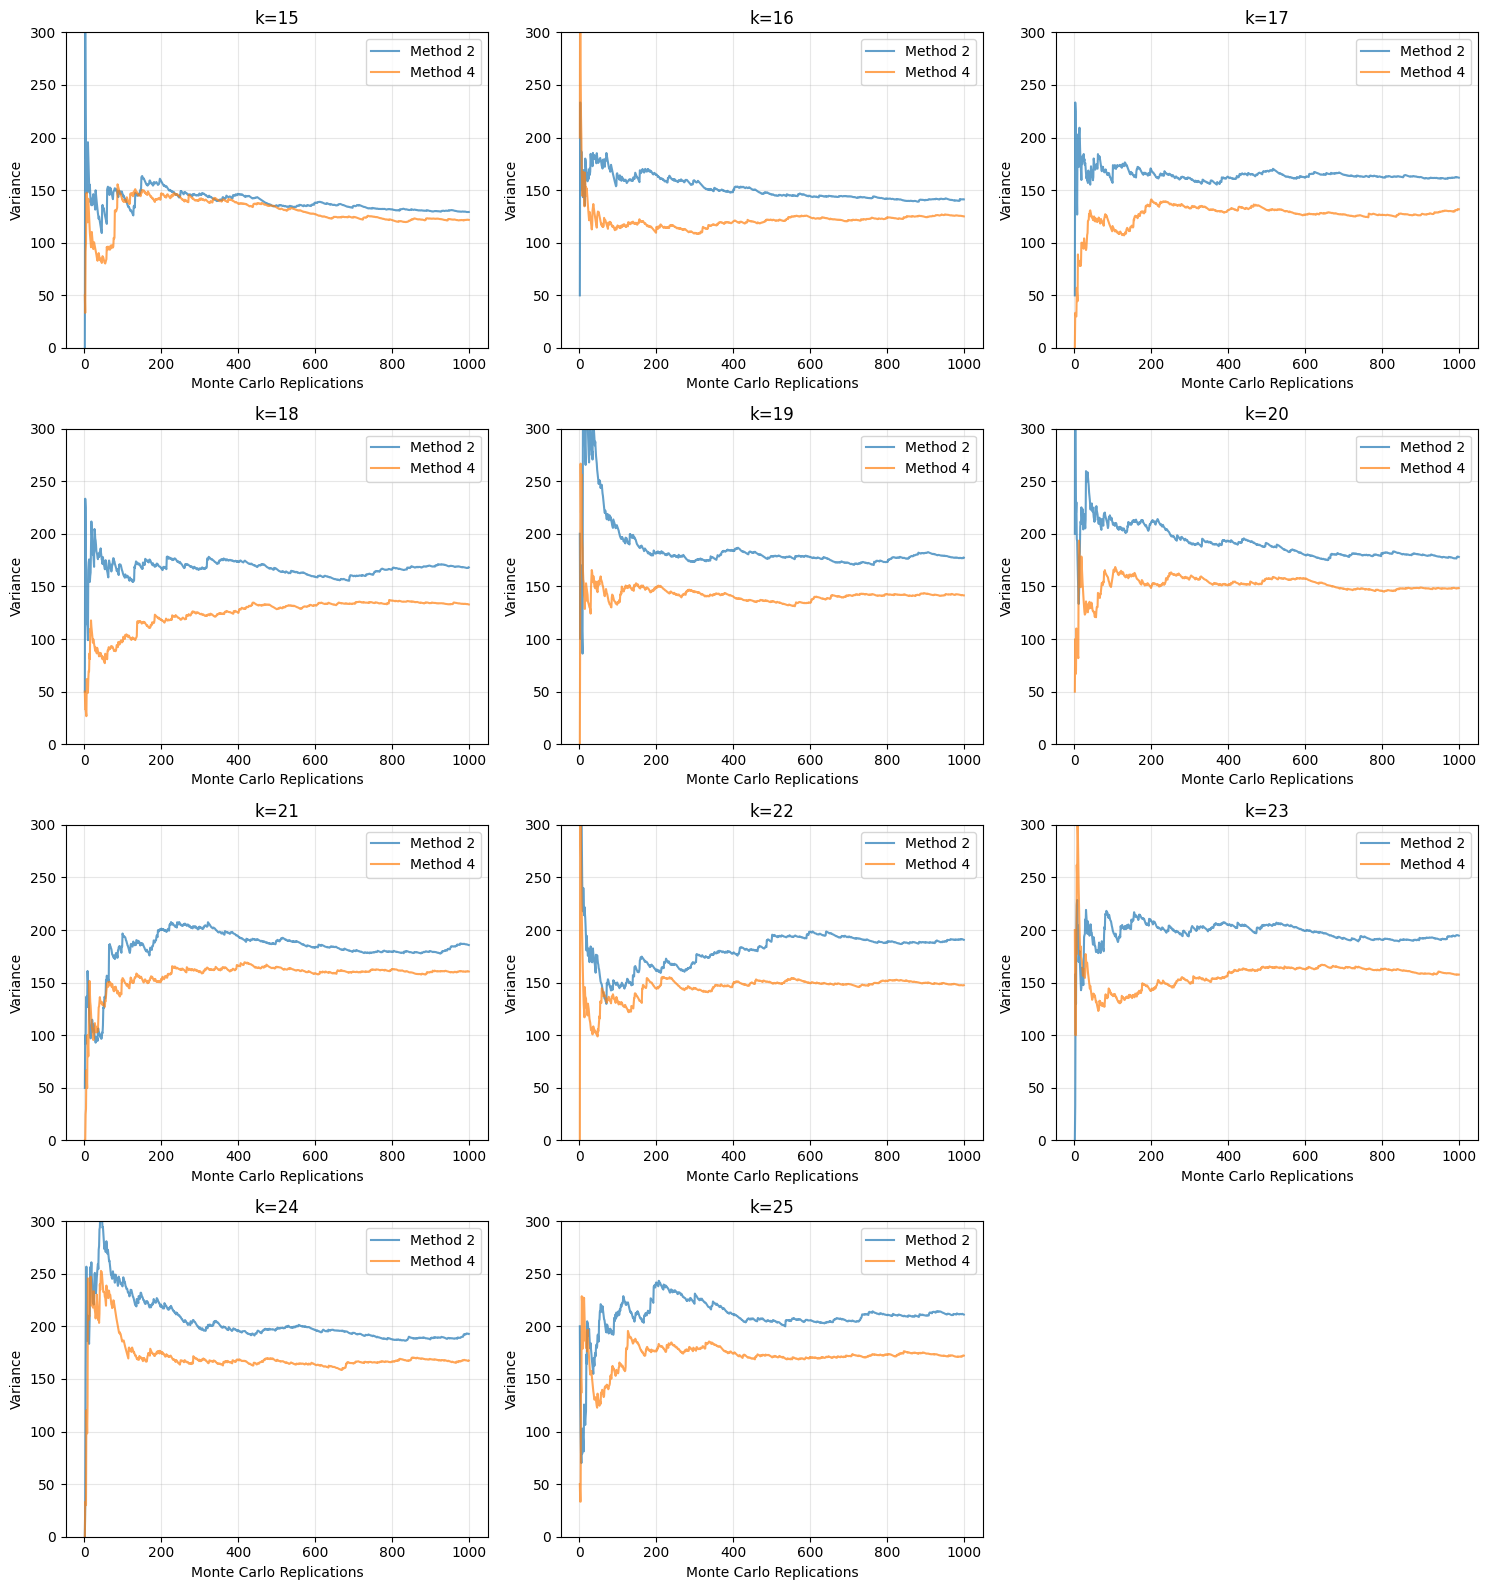

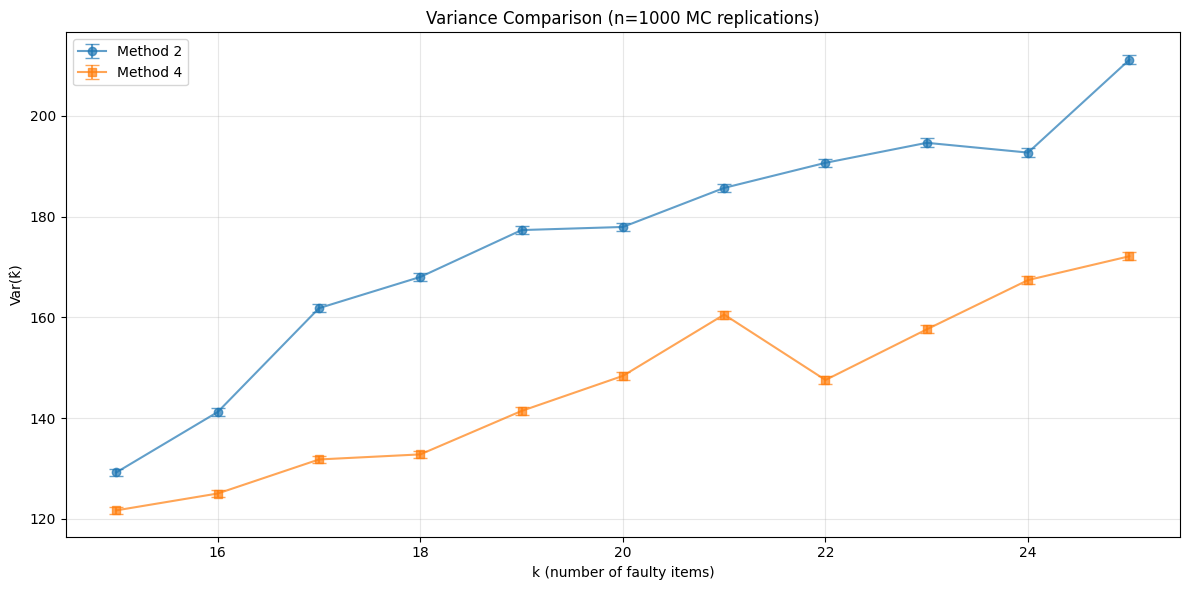


Variance Comparison:
k     Var(k̂₂)     Var(k̂₄)     Ratio (Var₂/Var₄)
--------------------------------------------------
15    129.26       121.72       1.06        
16    141.24       125.06       1.13        
17    161.85       131.82       1.23        
18    168.05       132.82       1.27        
19    177.35       141.45       1.25        
20    177.97       148.41       1.20        
21    185.72       160.58       1.16        
22    190.70       147.59       1.29        
23    194.67       157.65       1.23        
24    192.73       167.43       1.15        
25    211.15       172.15       1.23        


In [5]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    mc_reps = np.arange(2, mc_runs + 1) # start from 2 to avoid variance of a single estimate being zero (same below)
    
    # Cumulative variance estimates
    k2_cum_var = [np.var(k2_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    k4_cum_var = [np.var(k4_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.7)
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.7)
    ax.set_title(f'k={k}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    ax.set_ylim(0, 300)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last subplot (we only have 11 values of k)
axes[11].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(12, 6))

plt.errorbar(k_values, k2_vars, yerr=k2_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=6)
plt.errorbar(k_values, k4_vars, yerr=k4_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=6)

plt.xlabel('k (number of faulty items)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison (n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison:")
print(f"{'k':<5} {'Var(k̂₂)':<12} {'Var(k̂₄)':<12} {'Ratio (Var₂/Var₄)':<12}")
print("-" * 50)
for i, k in enumerate(k_values):
    ratio = k2_vars[i] / k4_vars[i] if k4_vars[i] > 0 else float('inf')
    print(f"{k:<5} {k2_vars[i]:<12.2f} {k4_vars[i]:<12.2f} {ratio:<12.2f}")

### b) Worst case, compare variance

In [ ]:
K = 20
l_values = [2, 4, 5, 10]

k2_ests_b = {l: [] for l in l_values}
k4_ests_b = {l: [] for l in l_values}

for l in l_values:
    for run in range(mc_runs):
        blocks2 = np.zeros((n//m, m))
        blocks2[:l, :(K//l)] = 1 # put in K=20 faulty items in l blocks
        np.random.shuffle(blocks2) # shuffle order of blocks (same for both methods)

        line2 = blocks2.flatten() # flatten back to line format


        # METHOD 2

        k2_ests_b[l].append(method_2(line2, m))

        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")



        # METHOD 4

        k4_ests_b[l].append(method_4(line2, m))

        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

In [7]:
k2_variances_b = [np.var(k2_ests_b[l], ddof=1) for l in l_values]
k4_variances_b = [np.var(k4_ests_b[l], ddof=1) for l in l_values]

k2_std_errors_b = [np.std(k2_ests_b[l], ddof=1) / np.sqrt(mc_runs) for l in l_values]
k4_std_errors_b = [np.std(k4_ests_b[l], ddof=1) / np.sqrt(mc_runs) for l in l_values]

k2_ci_b = 1.96 * np.array(k2_std_errors_b)
k4_ci_b = 1.96 * np.array(k4_std_errors_b)

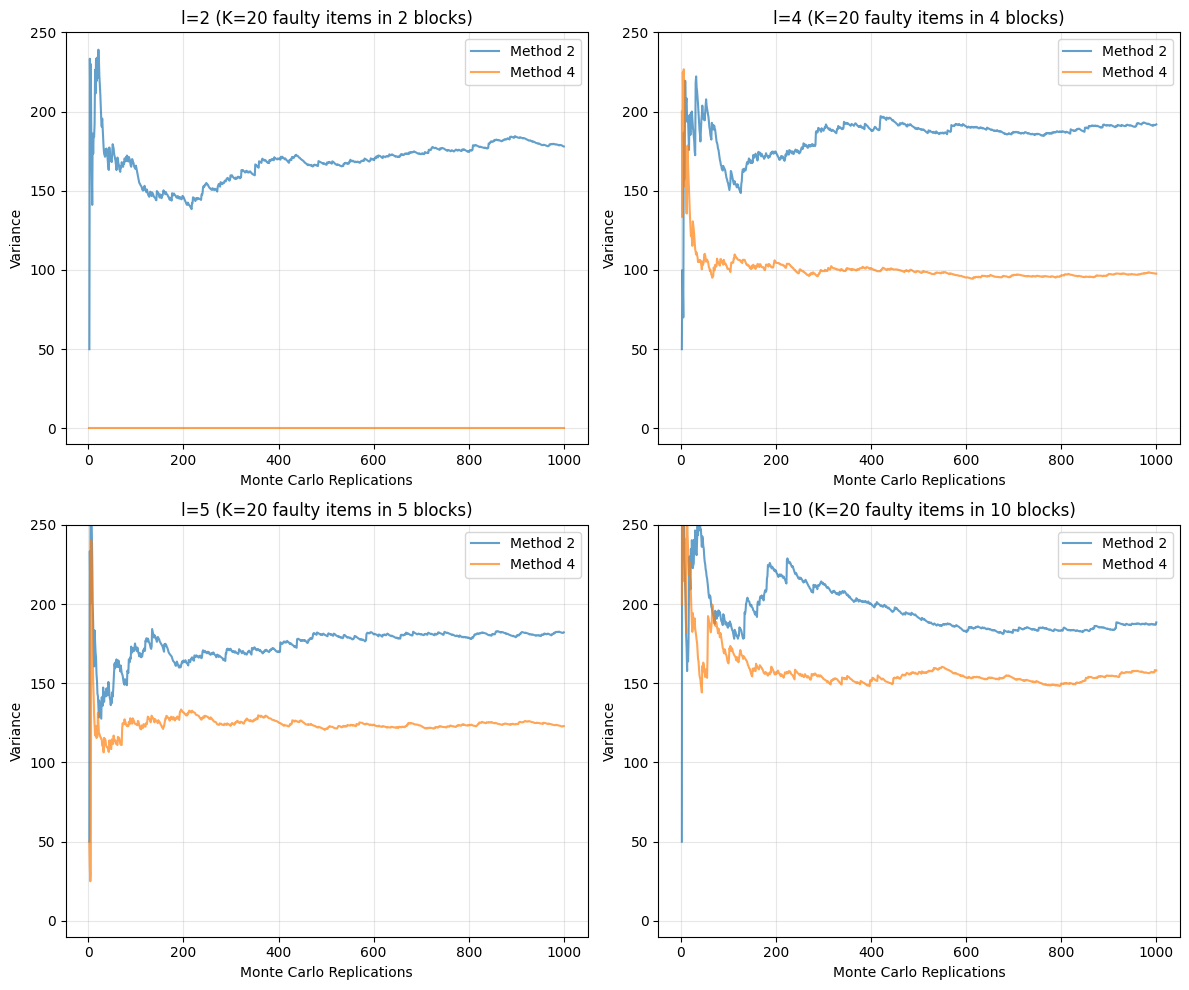

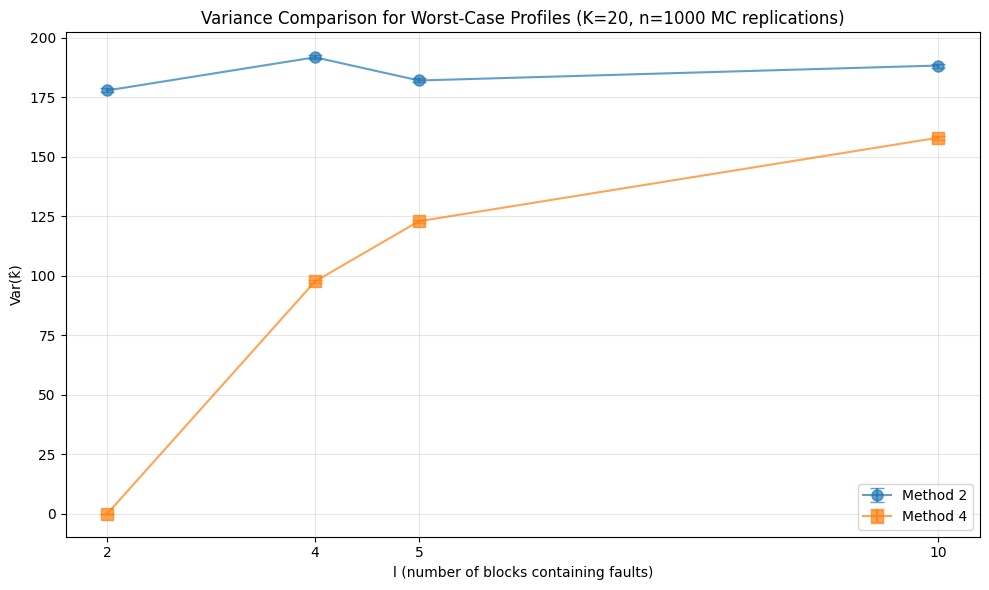


Variance Comparison (Worst-Case Profiles):
l     Var(k̂₂)     Var(k̂₄)     Ratio (Var₂/Var₄)
--------------------------------------------------
2     177.94       0.00         inf         
4     191.87       97.66        1.96        
5     182.12       122.98       1.48        
10    188.41       158.09       1.19        


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    # Cumulative variance estimates
    k2_cum_var = [np.var(k2_ests_b[l][:i], ddof=1) for i in range(1, mc_runs + 1)]
    k4_cum_var = [np.var(k4_ests_b[l][:i], ddof=1) for i in range(1, mc_runs + 1)]
    
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.7)
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.7)
    ax.set_title(f'l={l} (K={K} faulty items in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    
    # Set consistent limits
    ax.set_ylim(-10, 250)
    
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, k2_variances_b, yerr=k2_ci_b, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, k4_variances_b, yerr=k4_ci_b, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('l (number of blocks containing faults)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison for Worst-Case Profiles (K={K}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison (Worst-Case Profiles):")
print(f"{'l':<5} {'Var(k̂₂)':<12} {'Var(k̂₄)':<12} {'Ratio (Var₂/Var₄)':<12}")
print("-" * 50)
for i, l in enumerate(l_values):
    ratio = k2_variances_b[i] / k4_variances_b[i] if k4_variances_b[i] > 0 else float('inf')
    print(f"{l:<5} {k2_variances_b[i]:<12.2f} {k4_variances_b[i]:<12.2f} {ratio:<12.2f}")

### c) Random input, compare detection error

In [28]:
tau = 20
beta_values = [0.05, 0.1, 0.15, 0.2, 0.25]

R2 = {beta: [] for beta in beta_values} # dictionary to store results for each beta value
R4 = {beta: [] for beta in beta_values}


for beta in beta_values:
    FN2 = 0
    FP2 = 0
    FN4 = 0
    FP4 = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        line3 = np.zeros(n)
        line3[:random_k] = 1 # put in random_k faulty items
        np.random.shuffle(line3) # randomize order (same for both methods)


        # METHOD 2
        k2_est_c = method_2(line3, m)
        if k2_est_c <= tau and random_k >= (1 + beta) * tau:
            FN2 += 1 # add one and at end divide by mc_runs to get FN probability

        if k2_est_c > tau and random_k <= (1 - beta) * tau:
            FP2 += 1


        # METHOD 4
        k4_est_c = method_4(line3, m)
        if k4_est_c <= tau and random_k >= (1 + beta) * tau:
            FN4 += 1
        if k4_est_c > tau and random_k <= (1 - beta) * tau:
            FP4 += 1

        FN2_prob = FN2 / run
        FP2_prob = FP2 / run
        R2[beta].append(0.5 * (FN2_prob + FP2_prob)) # average of FN and FP probabilities

        FN4_prob = FN4 / run
        FP4_prob = FP4 / run
        R4[beta].append(0.5 * (FN4_prob + FP4_prob))

In [29]:
R2_final = [R2[beta][-1] for beta in beta_values]
R4_final = [R4[beta][-1] for beta in beta_values]

# Standard error for binomial proportion: sqrt(p(1-p)/n)
R2_std_errors = [np.sqrt(R2_final[i] * (1 - R2_final[i]) / mc_runs) for i in range(len(beta_values))]
R4_std_errors = [np.sqrt(R4_final[i] * (1 - R4_final[i]) / mc_runs) for i in range(len(beta_values))]

R2_ci = 1.96 * np.array(R2_std_errors)
R4_ci = 1.96 * np.array(R4_std_errors)


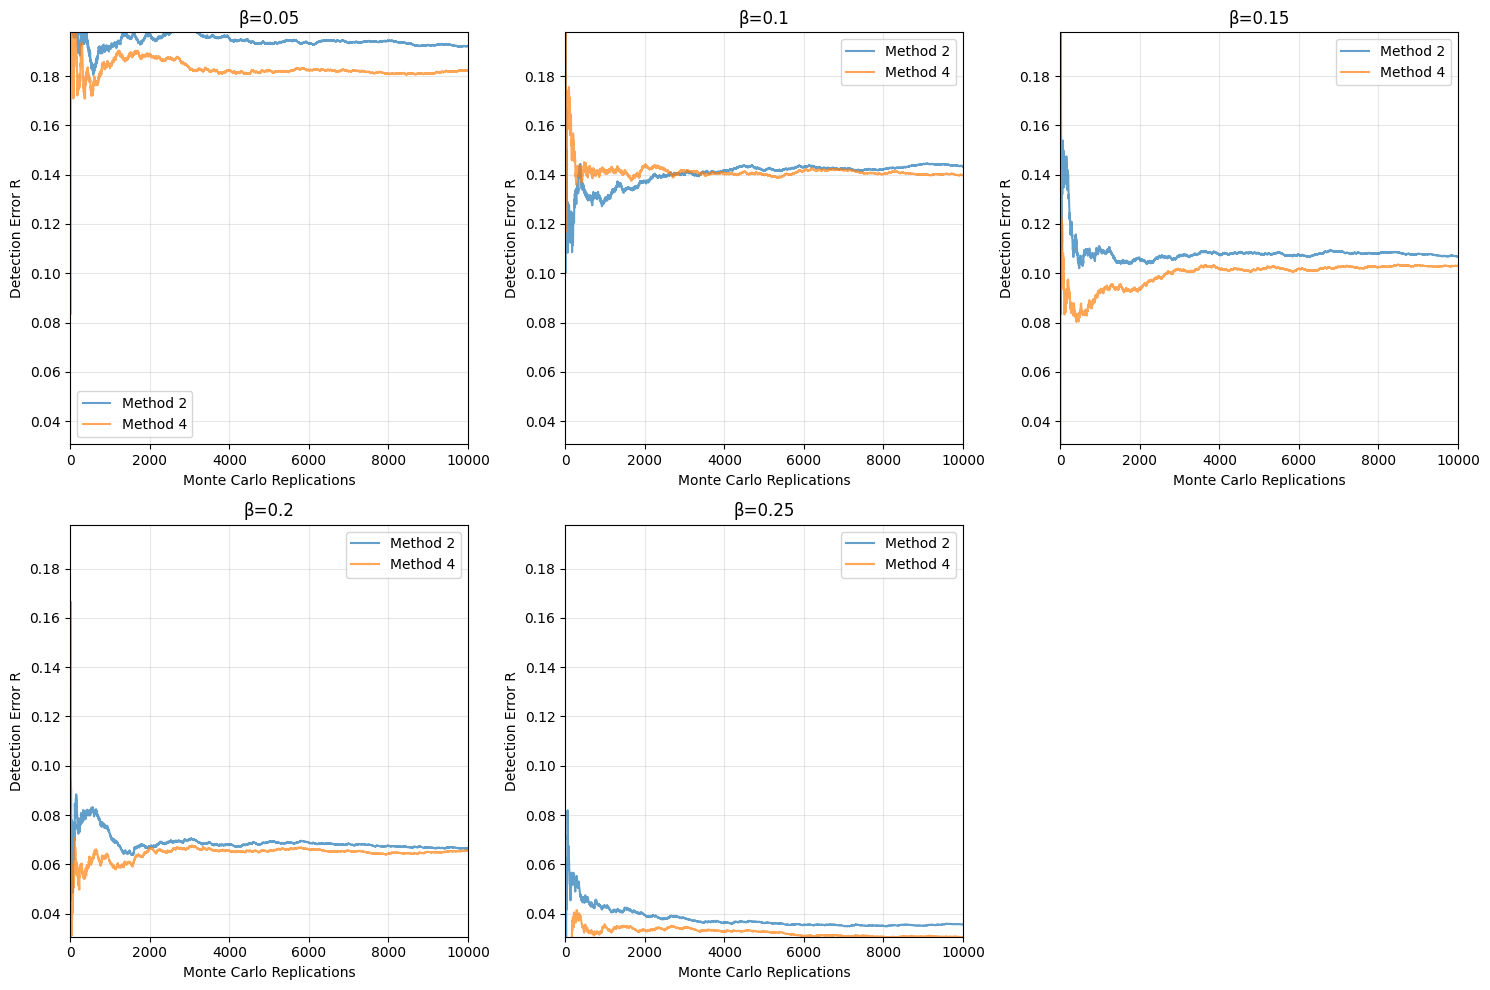

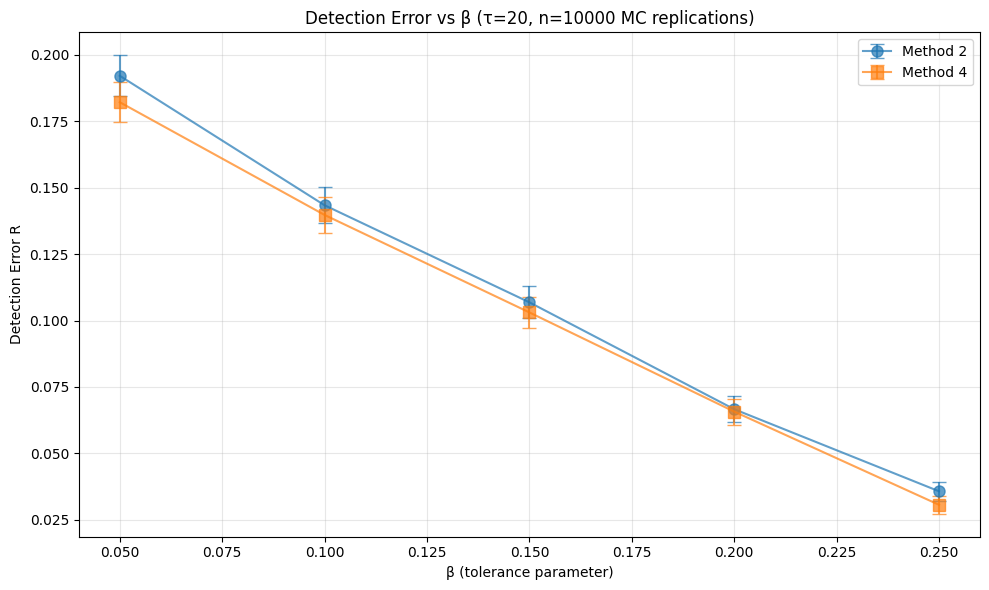


Detection Error Comparison:
β        R₂           R₄           Difference  
--------------------------------------------------
0.05     0.1922       0.1822       0.0100      
0.1      0.1434       0.1397       0.0037      
0.15     0.1069       0.1030       0.0038      
0.2      0.0666       0.0657       0.0009      
0.25     0.0357       0.0306       0.0051      


In [30]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Find global min/max for consistent scaling (removing outliers)
all_R_values = []
for beta in beta_values:
    all_R_values.extend(R2[beta])
    all_R_values.extend(R4[beta])

y_min = np.percentile(all_R_values, 1)
y_max = np.percentile(all_R_values, 99)

for idx, beta in enumerate(beta_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    ax.plot(mc_reps, R2[beta], label='Method 2', alpha=0.7)
    ax.plot(mc_reps, R4[beta], label='Method 4', alpha=0.7)
    ax.set_title(f'β={beta}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs β
plt.figure(figsize=(10, 6))

plt.errorbar(beta_values, R2_final, yerr=R2_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(beta_values, R4_final, yerr=R4_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('β (tolerance parameter)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs β (τ={tau}, n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison:")
print(f"{'β':<8} {'R₂':<12} {'R₄':<12} {'Difference':<12}")
print("-" * 50)
for i, beta in enumerate(beta_values):
    diff = R2_final[i] - R4_final[i]
    print(f"{beta:<8} {R2_final[i]:<12.4f} {R4_final[i]:<12.4f} {diff:<12.4f}")

### d) Random input, compare detection error

In [39]:
R2_d = {l: [] for l in l_values} # dictionary to store results for each l value
R4_d = {l: [] for l in l_values}
beta_d = 0.1


for l in l_values:
    FN2_d = 0
    FP2_d = 0
    FN4_d = 0
    FP4_d = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        blocks4 = np.zeros((n//m, m))

        if random_k > 0:
            # Distribute random_k faults across ℓ blocks as evenly as possible
            faults_per_block = random_k // l
            extra_faults = random_k % l
            
            for i in range(l):
                if i < extra_faults:
                    blocks4[i, :min(faults_per_block + 1, m)] = 1
                else:
                    blocks4[i, :min(faults_per_block, m)] = 1
                    
        np.random.shuffle(blocks4) # shuffle order of blocks (same for both methods)

        line4 = blocks4.flatten() # flatten back to line format


        # METHOD 2
        k2_est_d = method_2(line4, m)
        if k2_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN2_d += 1 # add one and at end divide by mc_runs to get FN probability

        if k2_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP2_d += 1


        # METHOD 4
        k4_est_d = method_4(line4, m)
        if k4_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN4_d += 1
        if k4_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP4_d += 1


        FN2_prob = FN2_d / run
        FP2_prob = FP2_d / run
        R2_d[l].append(0.5 * (FN2_prob + FP2_prob)) # average of FN and FP probabilities

        FN4_prob = FN4_d / run
        FP4_prob = FP4_d / run
        R4_d[l].append(0.5 * (FN4_prob + FP4_prob))

In [40]:
R2_d_final = [R2_d[l][-1] for l in l_values]
R4_d_final = [R4_d[l][-1] for l in l_values]

# Standard error for binomial proportion: sqrt(p(1-p)/n)
R2_d_std_errors = [np.sqrt(max(0.0001, R2_d_final[i] * (1 - R2_d_final[i]) / mc_runs)) for i in range(len(l_values))]
R4_d_std_errors = [np.sqrt(max(0.0001, R4_d_final[i] * (1 - R4_d_final[i]) / mc_runs)) for i in range(len(l_values))]

R2_d_ci = 1.96 * np.array(R2_d_std_errors)
R4_d_ci = 1.96 * np.array(R4_d_std_errors)

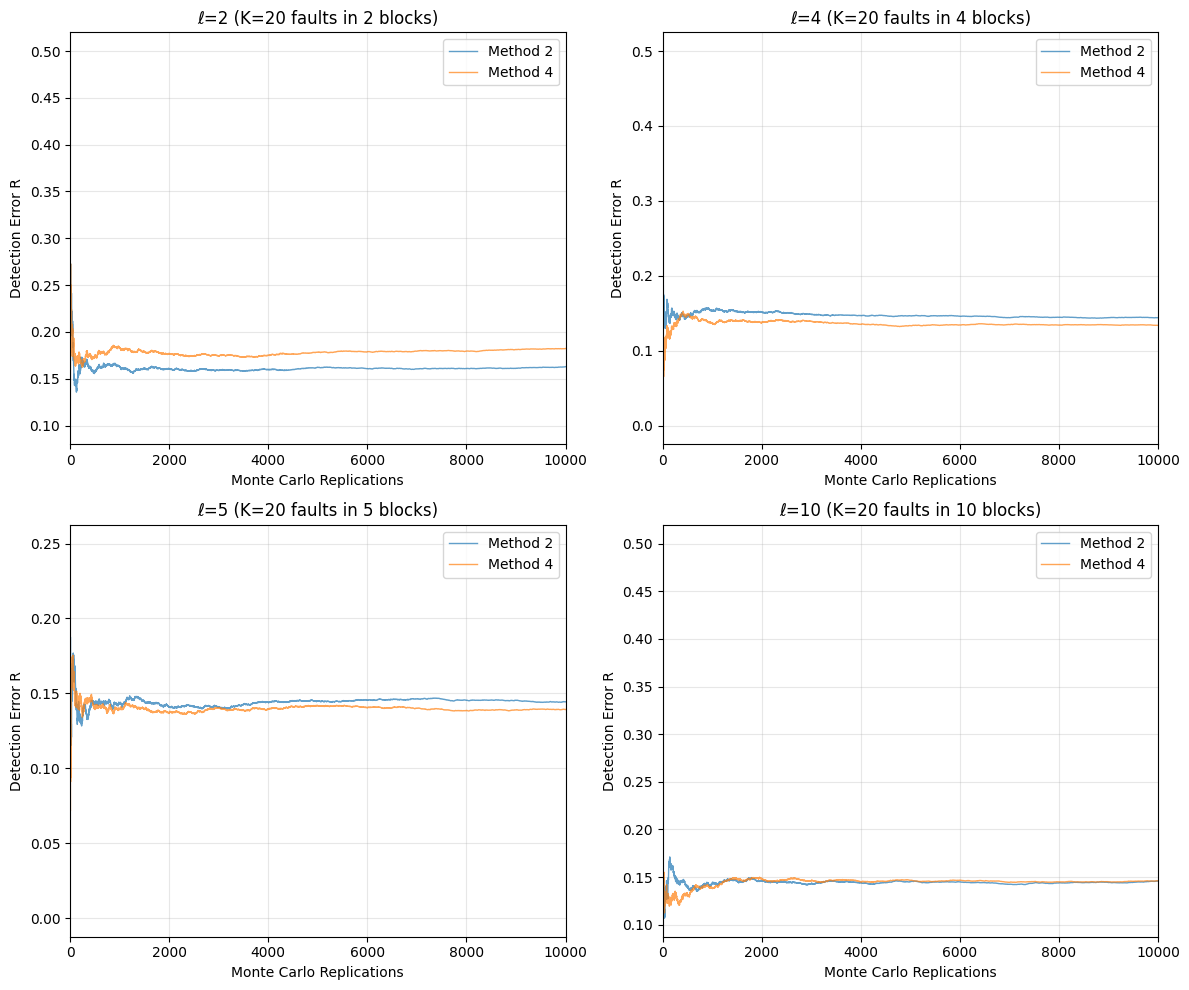

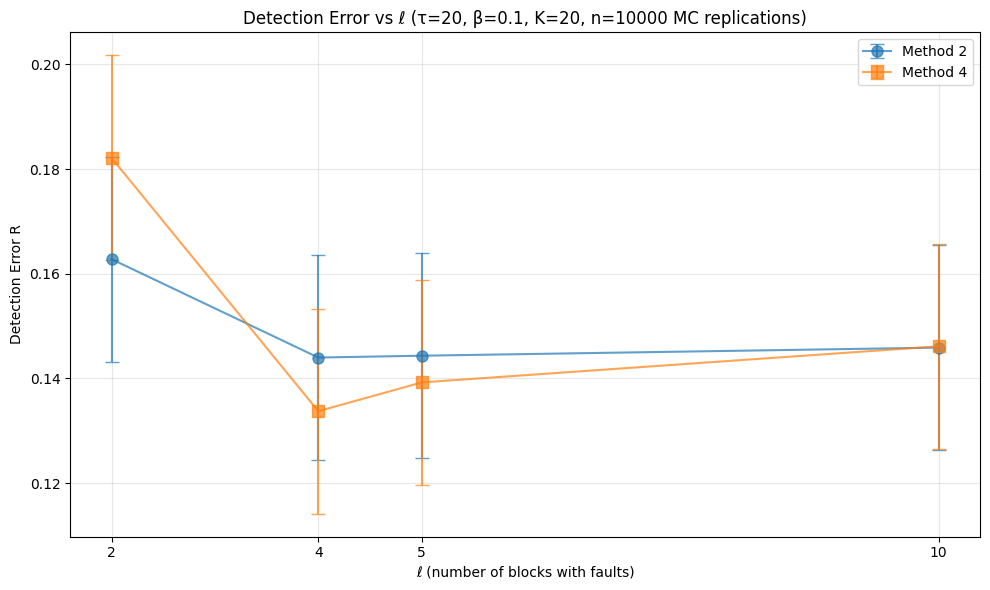


Detection Error Comparison (Worst-Case-ℓ):
ℓ        R₂           R₄           Difference  
--------------------------------------------------
2        0.1628       0.1822       -0.0194     
4        0.1440       0.1337       0.0103      
5        0.1444       0.1392       0.0051      
10       0.1459       0.1462       -0.0003     


In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Find global min/max for consistent scaling (removing outliers)
all_R_d_values = []
for l in l_values:
    all_R_d_values.extend(R2_d[l])
    all_R_d_values.extend(R4_d[l])

#y_min_d = max(0, np.percentile(all_R_d_values, 1))
#y_max_d = min(1, np.percentile(all_R_d_values, 99))

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    ax.plot(mc_reps, R2_d[l], label='Method 2', alpha=0.7, linewidth=1)
    ax.plot(mc_reps, R4_d[l], label='Method 4', alpha=0.7, linewidth=1)
    ax.set_title(f'ℓ={l} (K={K} faults in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    #ax.set_ylim(y_min_d, y_max_d)
    ax.legend()
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs ℓ
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, R2_d_final, yerr=R2_d_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, R4_d_final, yerr=R4_d_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('ℓ (number of blocks with faults)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs ℓ (τ={tau}, β={beta_d}, K={K}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison (Worst-Case-ℓ):")
print(f"{'ℓ':<8} {'R₂':<12} {'R₄':<12} {'Difference':<12}")
print("-" * 50)
for i, l in enumerate(l_values):
    diff = R2_d_final[i] - R4_d_final[i]
    print(f"{l:<8} {R2_d_final[i]:<12.4f} {R4_d_final[i]:<12.4f} {diff:<12.4f}")

### e)
When considering the variances of the estimators, method 4 consistently has lower variances in both the random and worst case inputs compared to method 2. In fact, in the worst case scenario with $l=2$, there is 0 variance for method 4. \
However, when comparing the detection error, both of the methods actually seem quite comparable. For random input, method 4 is consistently slightly better, but for the worst case input it is more balanced.